#Nome: `Renan de Oliveira da Cruz`

Número USP: 10801090

Número UFSCar: 810723

E-mail: r_oliveira@usp.br

Github: http://github.com/nan-oliveira

Disciplina: Processos Estocásticos

Lista 2 - Cadeias de Markov: Probabilidades de Transição

Import das bibliotecas necessárias para o notebook.

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd

Fixar semente. 

In [2]:
rd.seed(9)

## Considere uma cadeia de Markov $\{X_n\}_{n \geq 0 }$ com espaço de estados S = $\{0, 1\}$ e com matriz de probabilidade de transição dada por:

$$P = \begin{bmatrix} p & 1-p \\ q & 1 - q \end{bmatrix}$$

Escolha valores de $p$ e $q$ tais que $q−p < 0.5$ e $p < q$. Resolva os itens abaixo justificando suas respostas.

Sendo assim, seja $p = 0.2$ e $q = 0.6$.

### a) Escreva a função de atualização da cadeia utilizando a função de atualização definida na Proposição 2.3 das notas de aula 4.

In [3]:
def Fupdate(x, u, p = 0.2, q = 0.6):
  if (x == 0): x_n = 0 if (u <= p) else 1
  if (x == 1): x_n = 0 if (u <= q) else 1
  return x_n

### b) Construa um acoplamento livre $(X^0_n, X^1_n)$ com base na função de atualização obtida em (a) utilizando o programa de sua preferência (R, Python). Simule 100 valores para a cadeia acoplada e faça o gráfico das trajetórias do processo.

In [4]:
def simuCM(B, x_0, x_1):
  vec_sim_0 = [x_0]
  vec_sim_1 = [x_1]
  for i in range(B):
    u = rd.uniform(0.0, 1.0)
    vec_sim_0.append(Fupdate(vec_sim_0[i], u))
    vec_sim_1.append(Fupdate(vec_sim_1[i], u))
  return [vec_sim_0, vec_sim_1]

In [5]:
val_sim = simuCM(100, 0, 1)

Gráfico das trajetórias.

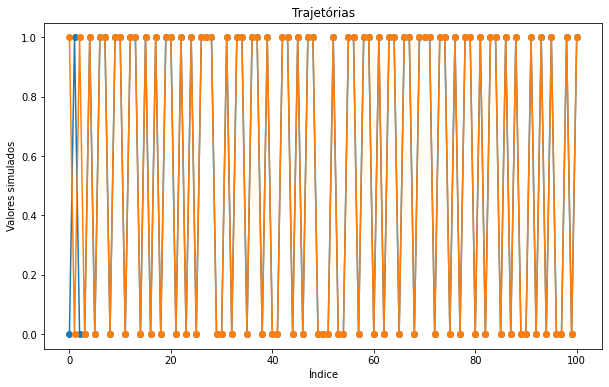

In [6]:
plt.figure(figsize = (10, 6))

x_axis = np.arange(101)

plt.plot(x_axis, val_sim[0], linestyle = '-', marker = 'o')
plt.plot(x_axis, val_sim[1], linestyle = '-', marker = 'o')
plt.title("Trajetórias")
plt.xlabel("Índice")
plt.ylabel("Valores simulados")

plt.show()

Gráfico das trajetórias para os primeiros valores.

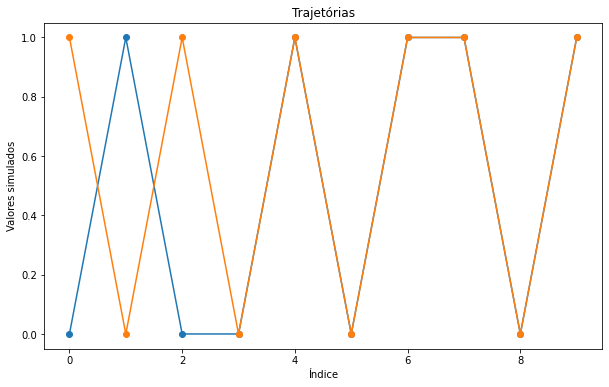

In [7]:
plt.figure(figsize = (10, 6))

x_axis = np.arange(10)

plt.plot(x_axis, val_sim[0][:10], linestyle = '-', marker = 'o')
plt.plot(x_axis, val_sim[1][:10], linestyle = '-', marker = 'o')
plt.title("Trajetórias")
plt.xlabel("Índice")
plt.ylabel("Valores simulados")

plt.show()

### c) Com base em diferentes amostras do acoplamento $(X^0_n, X^1_n)$, estude a distribuição empírica do tempo $\tau^{0,1}$ em que os dois processos levam para coincidir. Compare o resultado obtido na Proposição 2.3 das notas de aula 4.

Função que gera os tempos de coincidência:

In [8]:
def timeMatch(B, x_0, x_1):
  tau = []
  for j in range(B):
    vec_sim_0 = [x_0]
    vec_sim_1 = [x_1]
    i = 0
    while True:
      u = rd.uniform(0.0, 1.0)
      vec_sim_0.append(Fupdate(vec_sim_0[i], u))
      vec_sim_1.append(Fupdate(vec_sim_1[i], u))
      i += 1
      if vec_sim_0[-1] == vec_sim_1[-1]:
        break
    tau.append(i)
  return tau

Simulação dos tempos de coincidência.

In [9]:
qtde_sim = np.arange(10, 5001, 10)
tau_val = [np.mean(timeMatch(i , 0 , 1)) for i in qtde_sim]

Abaixo temos um gráfico em que no eixo y é o valor médio dos tempos de coincidência e no eixo x é o tamanho amostral referente a simulação. 

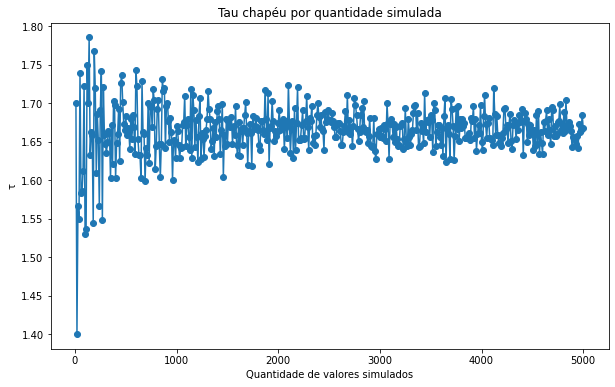

In [10]:
plt.figure(figsize = (10, 6))

plt.plot(qtde_sim, tau_val, linestyle = '-', marker = 'o')
plt.title("Tau chapéu por quantidade simulada")
plt.xlabel("Quantidade de valores simulados")
plt.ylabel(chr(964))

plt.show()

Vamos avaliar a distribuição dos "tau's" simulados (5000 valores).

In [11]:
tau_sim = timeMatch(5000, 0 , 1)
count_val = [[x, tau_sim.count(x)] for x in set(tau_sim)]

Gráfico da distribuição massa de probabilidade empírica do tau.

In [12]:
x_ax = []
y_ax = []

for x in count_val:
  x_ax.append(x[0])
  y_ax.append(x[1])
y_ax[:] = [x / sum(y_ax) for x in y_ax]

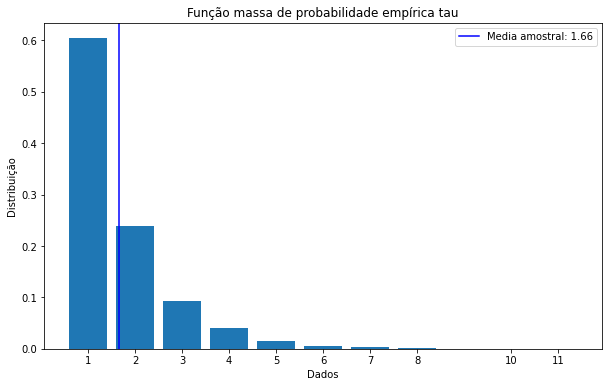

In [13]:
media = sum([a * b for a, b in zip(x_ax, y_ax)])

plt.figure(figsize = (10, 6))
plt.bar(x_ax, y_ax)
plt.xticks(x_ax)
plt.axvline(x = media, color='b', label = "Media amostral: " + str(round(media, 2)))
plt.legend(bbox_to_anchor=(1.0, 1), loc = 'best')
plt.title("Função massa de probabilidade empírica tau")
plt.xlabel("Dados")
plt.ylabel("Distribuição")
plt.show()

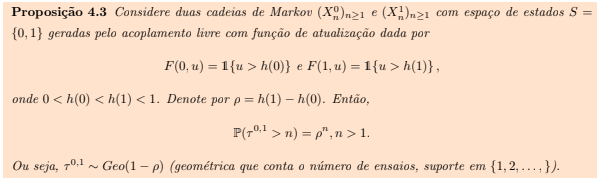

A proposição acima diz que tau segue distribuição geométrica com parâmetro $1 - \rho$, em que $\rho= h(1) - h(0)$. No caso, $\rho = 0.6 - 0.2 = 0.4$.

Visualmente podemos ver que a função massa de probabilidade empiríca aparenta ser fruto de uma distribuição geométrica.

Vamos comparar os valores teóricos com os amostrais por meio de uma tabela.

In [14]:
rho = 0.4
teo_value = [(1 - rho) * (rho) ** (n - 1) for n in range(1, 11)]

In [15]:
pd.DataFrame(list(zip(x_ax, y_ax, teo_value)),
             columns = ["n", "Prob Amostral", "Prob Teorica"]).round(3)

,n,Prob Amostral,Prob Teorica
0,1,0.604,0.600
1,2,0.239,0.240
2,3,0.093,0.096
3,4,0.040,0.038
4,5,0.014,0.015
5,6,0.005,0.006
6,7,0.003,0.002
7,8,0.001,0.001
8,10,0.000,0.000
9,11,0.000,0.000


A partir da tabela acima podemos perceber que os valores das probabilidade teóricas e amostrais estão bem próximas.

Destacando que as probabilidades acima são: $\mathbb{P}\left(\tau^{0,1} = n\right), n \geq 1$.

### d) Estime o valor esperado de $\tau^{0,1}$. Compare o valor estimado com o valor teórico.

Sendo $\tau^{0,1} \sim \operatorname{Geo}(1-\rho)$, temos que:

$$\mathbb{E}[\tau^{0,1}] = \frac{1}{1 - \rho} = \frac{1}{1 - 0.4} = 1,6667$$

O valor estimado é dado pela média dos tau's simulados. Seu valor numérico é: $1.6566$

O valor estimado está bem próximo do valor teórico.

In [16]:
sum([a * b for a, b in zip(x_ax, y_ax)])

1.6566